In [1]:
# Import of relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#modules for importing the data from sql
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

In [42]:
#read the database string from the .env
load_dotenv('../.env')

DB_STRING = os.getenv('DB_STRING')
db = create_engine(DB_STRING)

# #import the data to a pandas dataframe
# query_string = 'SELECT * FROM "2021"'
query_string = """SELECT * FROM "2021"
                    WHERE date >= '2021-10-01'
                    AND date <= '2021-12-31'
                    AND failure = '1';
                    """
                    # GROUP BY model;"""
# query_string = """SELECT * FROM "2021"
#                 WHERE model = 'ST12000NM0008' AND date = '2021-10-10'
#                 LIMIT 1000;"""
df_sqlalchemy_failure = pd.read_sql(query_string, db)
# df_sqlalchemy

In [43]:
df_2021_10_12 = df_sqlalchemy_failure

In [44]:
df_2021_10_12.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2021-12-31,2112E58C64F6,CT250MX500SSD1,250059350016,1,100.0,0.0,NaN,NaN,NaN,...,None,None,None,None,None,None,NaN,NaN,None,None
1,2021-12-26,2140E5D8CF37,CT250MX500SSD1,250059350016,1,100.0,0.0,NaN,NaN,NaN,...,None,None,None,None,None,None,NaN,NaN,None,None
2,2021-10-07,PL1331LAGTW9RH,HGST HMS5C4040ALE640,4000787030016,1,100.0,0.0,133.0,104.0,100.0,...,None,None,None,None,None,None,NaN,NaN,None,None
3,2021-10-08,PL2331LAGSTGTJ,HGST HMS5C4040ALE640,4000787030016,1,100.0,0.0,134.0,101.0,100.0,...,None,None,None,None,None,None,NaN,NaN,None,None
4,2021-10-24,PL1331LAHGVRAH,HGST HMS5C4040ALE640,4000787030016,1,100.0,0.0,135.0,99.0,142.0,...,None,None,None,None,None,None,NaN,NaN,None,None


In [34]:
df_2021_10_12.groupby('model').count().sort_values('failure', ascending=False).reset_index().head(10)

,model,date,serial_number,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,ST4000DM000,104,104,104,104,104,104,0,0,104,...,0,0,0,0,0,0,0,0,0,0
1,HP SSD S700 250GB,103,103,103,103,103,103,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TOSHIBA MG07ACA14TA,89,89,89,89,89,89,89,89,89,...,0,0,0,0,0,0,0,0,0,0
3,ST12000NM0008,66,66,66,66,65,65,0,0,65,...,0,0,0,0,0,0,0,0,0,0
4,ST8000NM0055,64,64,64,64,61,61,0,0,61,...,0,0,0,0,0,0,0,0,0,0
5,ST8000DM002,41,41,41,41,39,39,0,0,39,...,0,0,0,0,0,0,0,0,0,0
6,ST14000NM001G,28,28,28,28,28,28,0,0,28,...,0,0,0,0,0,0,0,0,0,0
7,ST14000NM0138,21,21,21,21,21,21,0,0,21,...,0,0,0,0,0,0,0,0,0,0
8,TOSHIBA MQ01ABF050M,19,19,19,19,19,19,19,19,19,...,0,0,0,0,0,0,0,0,0,0
9,ST12000NM0007,18,18,18,18,17,17,0,0,17,...,0,0,0,0,0,0,0,0,0,0


In [52]:
import os  
os.makedirs('../data/Saved_CSV', exist_ok=True)  
df_2021_10_12.to_csv('../data/Saved_CSV/2021-10_and_11.csv')  

In [45]:
df_2021_10_12.head()
df_2021_10_12['capacity_bytes'] = df_2021_10_12['capacity_bytes']/1000**3 #transforming with base 10 instead of 10 without RENAMING!
df_2021_10_12.head(20)
#df_2021_10_12.info()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2021-12-31,2112E58C64F6,CT250MX500SSD1,250.059350,1,100.0,0.000000e+00,NaN,NaN,NaN,...,None,None,None,None,None,None,NaN,NaN,None,None
1,2021-12-26,2140E5D8CF37,CT250MX500SSD1,250.059350,1,100.0,0.000000e+00,NaN,NaN,NaN,...,None,None,None,None,None,None,NaN,NaN,None,None
2,2021-10-07,PL1331LAGTW9RH,HGST HMS5C4040ALE640,4000.787030,1,100.0,0.000000e+00,133.0,104.0,100.0,...,None,None,None,None,None,None,NaN,NaN,None,None
3,2021-10-08,PL2331LAGSTGTJ,HGST HMS5C4040ALE640,4000.787030,1,100.0,0.000000e+00,134.0,101.0,100.0,...,None,None,None,None,None,None,NaN,NaN,None,None
4,2021-10-24,PL1331LAHGVRAH,HGST HMS5C4040ALE640,4000.787030,1,100.0,0.000000e+00,135.0,99.0,142.0,...,None,None,None,None,None,None,NaN,NaN,None,None
5,2021-11-27,PL1331LAHGVSJH,HGST HMS5C4040ALE640,4000.787030,1,100.0,0.000000e+00,134.0,103.0,126.0,...,None,None,None,None,None,None,NaN,NaN,None,None
6,2021-12-19,PL1331LAHGMVUH,HGST HMS5C4040ALE640,4000.787030,1,100.0,0.000000e+00,133.0,104.0,141.0,...,None,None,None,None,None,None,NaN,NaN,None,None
7,2021-11-24,PL1331LAHD2SAH,HGST HMS5C4040BLE640,4000.787030,1,48.0,1.058619e+09,134.0,100.0,143.0,...,None,None,None,None,None,None,NaN,NaN,None,None
8,2021-12-15,PL1331LAHGBSGH,HGST HMS5C4040BLE640,4000.787030,1,100.0,0.000000e+00,134.0,102.0,129.0,...,None,None,None,None,None,None,NaN,NaN,None,None
9,2021-12-11,PL1331LAHD07YH,HGST HMS5C4040BLE640,4000.787030,1,100.0,0.000000e+00,134.0,103.0,100.0,...,None,None,None,None,None,None,NaN,NaN,None,None


In [52]:
df_ST4000DM000 = df_2021_10_12[df_2021_10_12['model'] =='ST4000DM000']
df_ST4000DM000.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
323,2021-10-01,Z304MKJL,ST4000DM000,4000.78703,1,116.0,114682872.0,NaN,NaN,92.0,...,None,None,None,None,None,None,NaN,NaN,None,None
324,2021-10-02,Z304HTJ6,ST4000DM000,4000.78703,1,117.0,143235240.0,NaN,NaN,91.0,...,None,None,None,None,None,None,NaN,NaN,None,None
325,2021-10-02,Z304GR8P,ST4000DM000,4000.78703,1,120.0,244003688.0,NaN,NaN,91.0,...,None,None,None,None,None,None,NaN,NaN,None,None
326,2021-10-02,S301L4XY,ST4000DM000,4000.78703,1,102.0,5071976.0,NaN,NaN,91.0,...,None,None,None,None,None,None,NaN,NaN,None,None
327,2021-10-03,Z3041JEN,ST4000DM000,4000.78703,1,119.0,228196584.0,NaN,NaN,91.0,...,None,None,None,None,None,None,NaN,NaN,None,None


In [24]:
features_imp = ['failure','smart_5_raw','smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw']
features_norm = ['failure','smart_5_normalized','smart_187_normalized', 'smart_188_normalized', 'smart_197_normalized', 'smart_198_normalized']

array([[<AxesSubplot:title={'center':'failure'}>,
        <AxesSubplot:title={'center':'smart_5_raw'}>,
        <AxesSubplot:title={'center':'smart_187_raw'}>,
        <AxesSubplot:title={'center':'smart_188_raw'}>],
       [<AxesSubplot:title={'center':'smart_197_raw'}>,
        <AxesSubplot:title={'center':'smart_198_raw'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

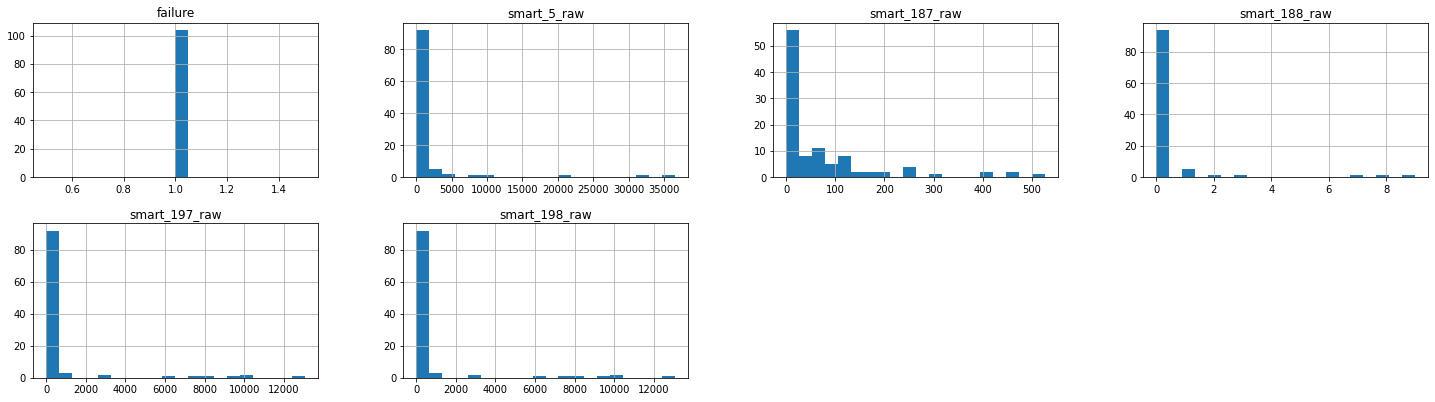

In [8]:
df_ST4000DM000[features_imp].hist(bins=20, figsize=(25, 25), layout=(7, 4))

In [28]:
#Correlation and heatmap
corr_mtrx = df_ST4000DM000[features_imp][1:].corr()
corr_mtrx
#plt.figure(figsize = (15,15))
#ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

,failure,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw
failure,NaN,NaN,NaN,NaN,NaN,NaN
smart_5_raw,NaN,1.000000,0.366065,0.757508,0.204462,0.204462
smart_187_raw,NaN,0.366065,1.000000,0.162938,0.341638,0.341638
smart_188_raw,NaN,0.757508,0.162938,1.000000,0.029354,0.029354
smart_197_raw,NaN,0.204462,0.341638,0.029354,1.000000,1.000000
smart_198_raw,NaN,0.204462,0.341638,0.029354,1.000000,1.000000


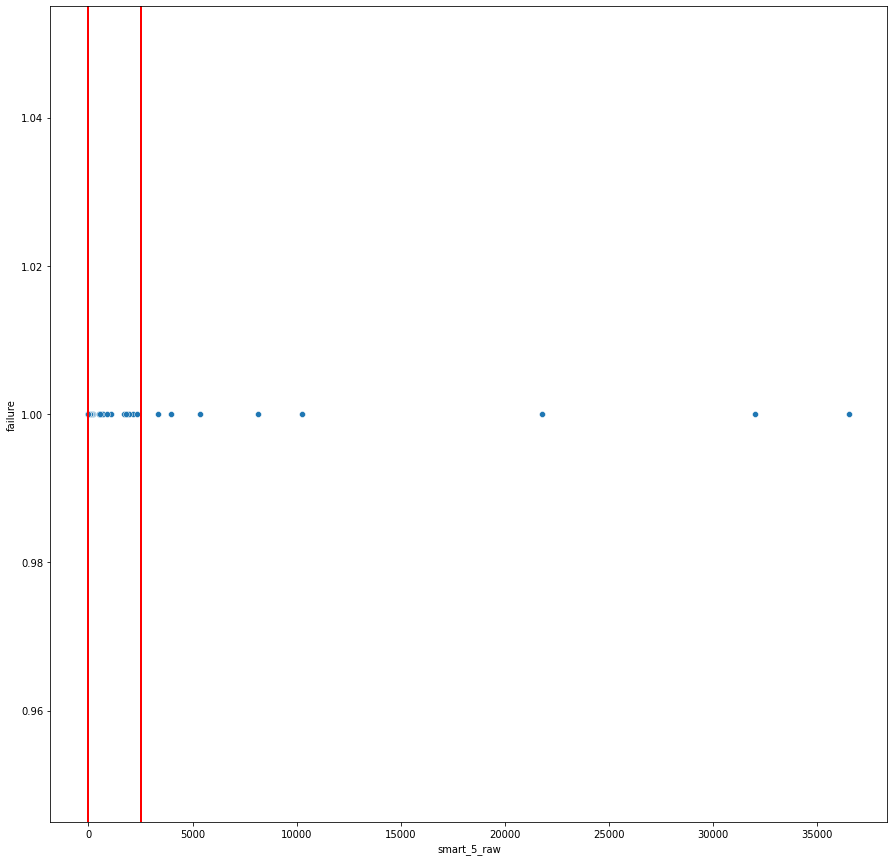

In [56]:
plt.figure(figsize = (15,15))
graph = sns.scatterplot(x=df_ST4000DM000.smart_5_raw, y=df_ST4000DM000.failure)
# graph.axhline(35, linewidth=2, color='r')
graph.axvline(0, linewidth=2, color='r')
graph.axvline(2500, linewidth=2, color='r')

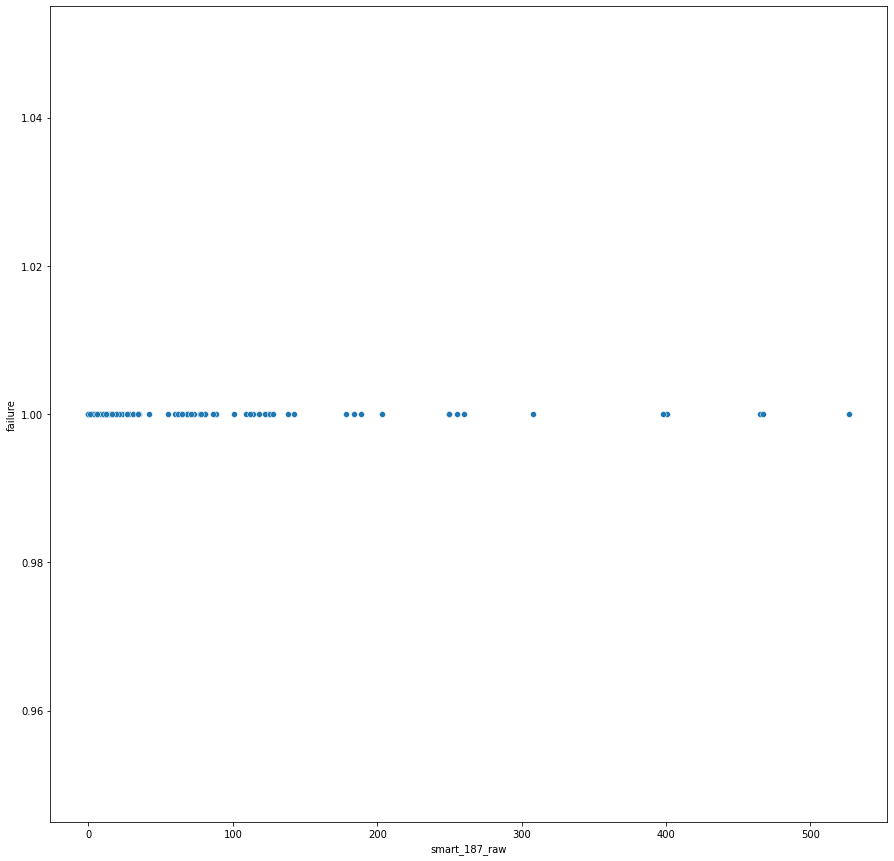

In [57]:
plt.figure(figsize = (15,15))
graph = sns.scatterplot(x=df_ST4000DM000.smart_187_raw, y=df_ST4000DM000.failure)
# graph.axhline(35, linewidth=2, color='r')
# graph.axvline(0, linewidth=2, color='r')
# graph.axvline(2500, linewidth=2, color='r')

In [59]:
df_ST4000DM000.smart_187_raw
print(df_ST4000DM000.smart_187_raw.describe())


count    104.000000
mean      69.711538
std      111.253116
min        0.000000
25%        0.000000
50%       16.000000
75%       86.500000
max      527.000000
Name: smart_187_raw, dtype: float64


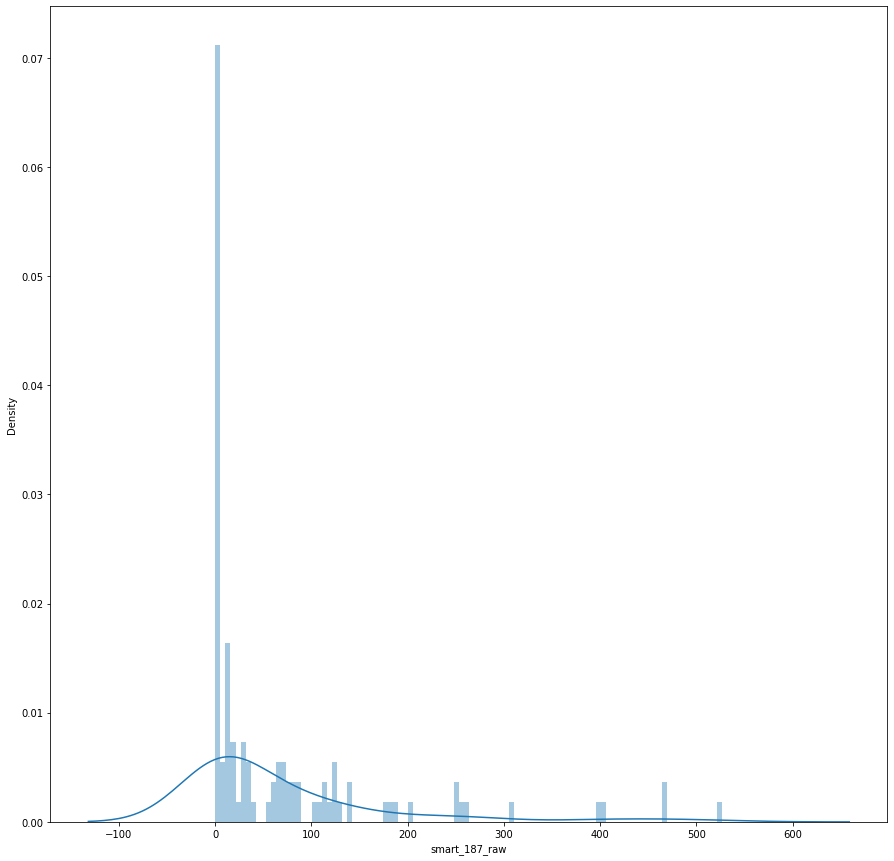

In [62]:
plt.figure(figsize=(15, 15))
plt.xlim() 
sns.distplot(df_ST4000DM000.smart_187_raw, bins=100, hist_kws={'alpha': 0.4});

In [9]:
query_string_0 = """SELECT * FROM "2021"
                    WHERE date >= '2021-10-01'
                    AND date <= '2021-12-31'
                    AND model = 'ST4000DM000'
                    AND failure = '0';
                    """
                    # GROUP BY model;"""
# query_string = """SELECT * FROM "2021"
#                 WHERE model = 'ST12000NM0008' AND date = '2021-10-10'
#                 LIMIT 1000;"""
df_sqlalchemy_no_failure = pd.read_sql(query_string_0, db)

In [13]:
df_2021_10_12_no_failure = df_sqlalchemy_no_failure

array([[<AxesSubplot:title={'center':'failure'}>,
        <AxesSubplot:title={'center':'smart_5_raw'}>,
        <AxesSubplot:title={'center':'smart_187_raw'}>,
        <AxesSubplot:title={'center':'smart_188_raw'}>],
       [<AxesSubplot:title={'center':'smart_197_raw'}>,
        <AxesSubplot:title={'center':'smart_198_raw'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

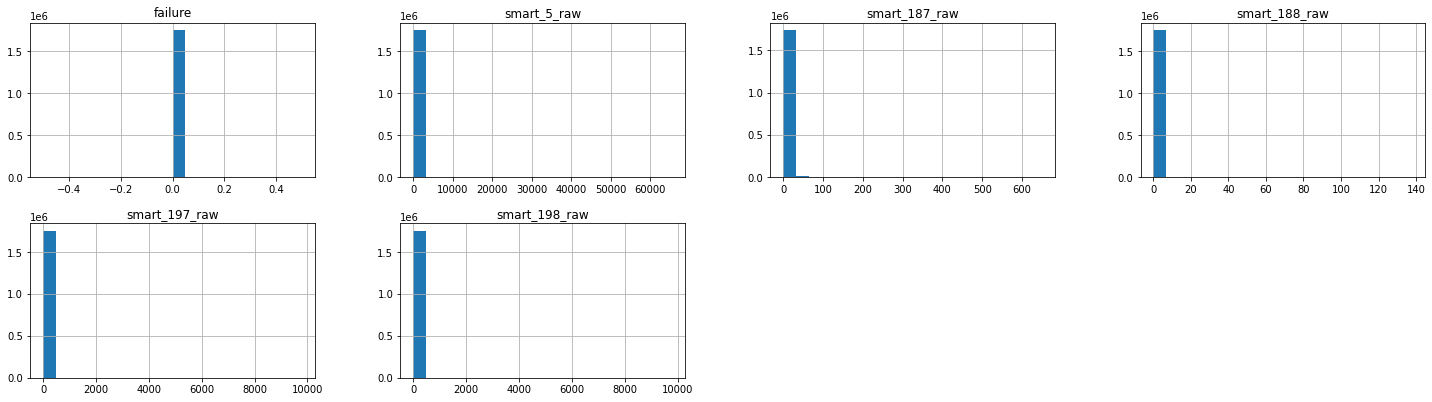

In [14]:
df_2021_10_12_no_failure[features_imp].hist(bins=20, figsize=(25, 25), layout=(7, 4))

In [13]:
df_source = pd.read_csv('../data/data_q4_2021/2021-10-01.csv', parse_dates=["date"])
df_source.head()
#df_source.info()


,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2021-10-01,ZLW18P9K,ST14000NM001G,14000519643136,0,84.0,224809696.0,NaN,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-01,ZLW0EGC7,ST12000NM001G,12000138625024,0,84.0,227542336.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-01,ZA1FLE1P,ST8000NM0055,8001563222016,0,82.0,169835352.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-01,ZA16NQJR,ST8000NM0055,8001563222016,0,83.0,198392224.0,NaN,NaN,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-01,1050A084F97G,TOSHIBA MG07ACA14TA,14000519643136,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
query_string_all = """SELECT * FROM "2021"
                    WHERE date >= '2021-10-01'
                    AND date <= '2021-12-31'
                    AND model = 'ST4000DM000'
                    """
                    # GROUP BY model;"""
# query_string = """SELECT * FROM "2021"
#                 WHERE model = 'ST12000NM0008' AND date = '2021-10-10'
#                 LIMIT 1000;"""
df_sqlalchemy_all = pd.read_sql(query_string_all, db)

In [18]:
df_2021_10_12_all = df_sqlalchemy_all

In [27]:
df_2021_10_12_all.head()
df_2021_10_12_all.isnull().sum()

date                          0
serial_number                 0
model                         0
capacity_bytes                0
failure                       0
                         ...   
smart_252_raw           1753485
smart_254_normalized    1753485
smart_254_raw           1753485
smart_255_normalized    1753485
smart_255_raw           1753485
Length: 179, dtype: int64

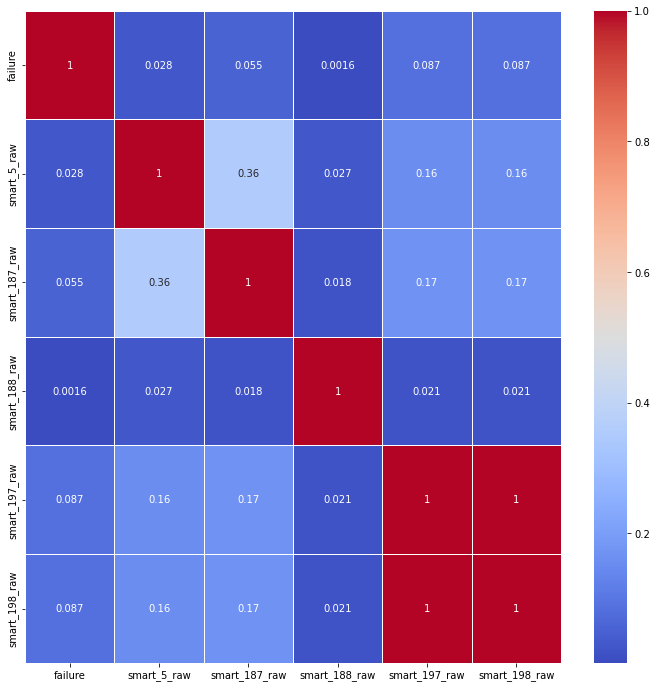

In [23]:
#Correlation and heatmap
corr_mtrx = df_2021_10_12_all[features_imp].corr()
corr_mtrx
plt.figure(figsize = (12,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

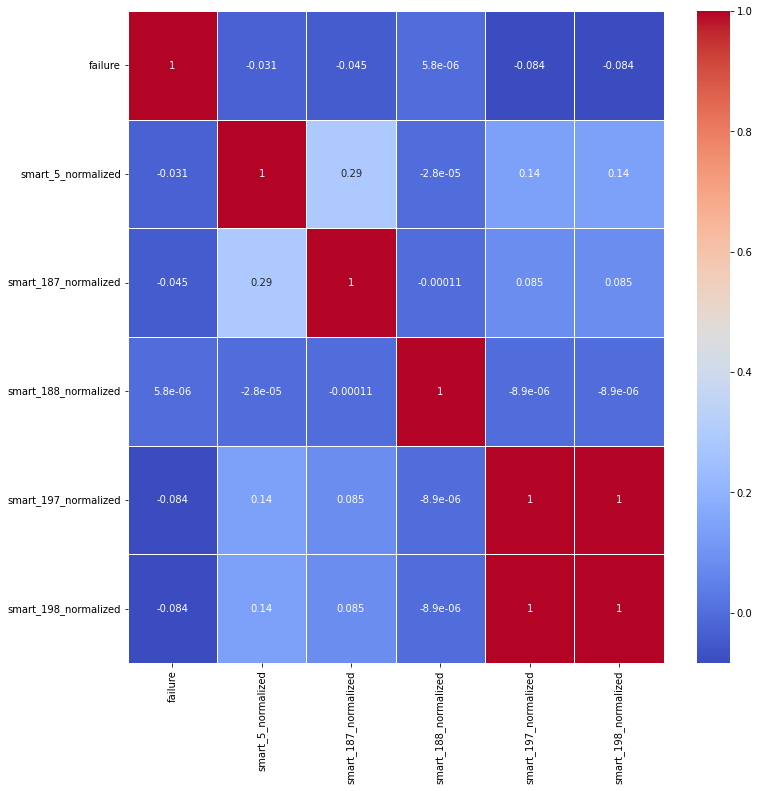

In [25]:
#Correlation and heatmap
corr_mtrx = df_2021_10_12_all[features_norm].corr()
corr_mtrx
plt.figure(figsize = (12,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

In [ ]:
# specify commonly used column names
column_name_all = df_source.columns
column_name_basic, column_name_smart = column_name_all[:5], column_name_all[5:]
column_name_smart_raw = pd.Index([c for c in column_name_smart if "raw" in c ])
column_name_smart_normalized = pd.Index([c for c in column_name_smart if "normalized" in c ])
print(column_name_basic)
print(column_name_smart_raw)
print(column_name_smart_normalized)

**Manipulating the CSV files**

In [21]:
# setup for reading time series
#serials = ['ZLW0EGC6', 'Z305B2QN', 'ZLW0C6NE', 'ZJV0XJQ3', 'ZLW18MKT', 'ZLW0GGTP']
serials = ['ZLW0EGC6', 'ZLW0GGTP']
start_date = "2021-10-01"
end_date = "2021-10-31"
days = pd.Period(end_date).dayofyear - pd.Period(start_date).dayofyear + 1
column_to_save = ['date', 'serial_number', 'model', 'capacity_bytes', 'failure', 'smart_1_normalized']
#column_to_save = ['date', 'capacity_bytes', 'failure', 'smart_1_normalized']
#column_to_save = column_name_all

In [22]:
# create a list of empty dataframes for concatenation later
time_series_dataset = []
for serial in serials:
    time_series_dataset.append(pd.DataFrame([], columns=column_to_save))

memory_used = 0
memory_warning_displayed = False
print(f"Read files for building time series from {start_date} to {end_date}; totally {days} days; {len(serials)} serials")
for day in range(days):
    date = pd.Period(start_date) + day
    print(f"  reading data for the date {date}; progress: {day+1}/{days}")
    file_path = "../data/data_Q4_2021/" + str(date) + ".csv"
    df_tmp = pd.read_csv(file_path, parse_dates=["date"])
    for i, serial in enumerate(serials):
        df_tmp_serial = df_tmp.query("serial_number == @serial")[column_to_save]
        time_series_dataset[i] = pd.concat([time_series_dataset[i], df_tmp_serial], ignore_index=True)
        memory_used += time_series_dataset[i].memory_usage(deep=True).sum()
    if memory_used/1024**3 > 1 and not memory_warning_displayed:
        print(" ### Warning: memory used for time-series dataframe > 1 GB ###")
        memory_warning_displayed = True

print("Time series was read successfully")
print(f"Memory used for dataframe: {(memory_used/1024**3).round(3)} GB")

Read files for building time series from 2021-10-01 to 2021-10-31; totally 31 days; 2 serials
  reading data for the date 2021-10-01; progress: 1/31
  reading data for the date 2021-10-02; progress: 2/31
  reading data for the date 2021-10-03; progress: 3/31
  reading data for the date 2021-10-04; progress: 4/31
  reading data for the date 2021-10-05; progress: 5/31
  reading data for the date 2021-10-06; progress: 6/31
  reading data for the date 2021-10-07; progress: 7/31
  reading data for the date 2021-10-08; progress: 8/31
  reading data for the date 2021-10-09; progress: 9/31
  reading data for the date 2021-10-10; progress: 10/31
  reading data for the date 2021-10-11; progress: 11/31
  reading data for the date 2021-10-12; progress: 12/31
  reading data for the date 2021-10-13; progress: 13/31
  reading data for the date 2021-10-14; progress: 14/31
  reading data for the date 2021-10-15; progress: 15/31
  reading data for the date 2021-10-16; progress: 16/31
  reading data for 

In [32]:
time_series_dataset[0].head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized
0,2021-10-01 00:00:00,ZLW0EGC6,ST12000NM001G,12000138625024,0,74.0
1,2021-10-02 00:00:00,ZLW0EGC6,ST12000NM001G,12000138625024,0,80.0
2,2021-10-03 00:00:00,ZLW0EGC6,ST12000NM001G,12000138625024,0,84.0
3,2021-10-04 00:00:00,ZLW0EGC6,ST12000NM001G,12000138625024,0,74.0
4,2021-10-05 00:00:00,ZLW0EGC6,ST12000NM001G,12000138625024,0,75.0


**Save it as .csv file**

In [ ]:
print("Save read time series to csv files")
for i, serial in enumerate(serials):
    file_path = "../data/time_series/" + serial + "_" + start_date + "_to_" + end_date + ".csv" 
    time_series_dataset[i].to_csv(file_path)
    print(f"  save to \"{file_path}\"; progress {i}/{len(serials)}")
print("Time series are saved successfully")